In [1]:
# Final Project for CAP6307
# Cat Baker and Darshay Blount
# Fall 2020

In [2]:
# install modules
!pip install lyricsgenius
!pip install textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /Users/catbaker3/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /Users/catbaker3/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/catbaker3/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/catbaker3/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/catbaker3/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/catbaker3/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [24]:
# import packages
from gensim.summarization import keywords
import spacy
import nltk
from nltk.corpus import stopwords
import pandas as pd
import lyricsgenius
import textblob
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# download spacy and import English
nltk.download('stopwords')
from spacy.lang.en import English

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/catbaker3/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
stopwords = set(stopwords.words('english'))

In [5]:
nlp = English()
nlp.max_length = 10000000

In [6]:
client_id = 'jGXOq14YmSS490yTKQ7CPzu8l7ui5v4JnbBvhIhQV8VV74cSTpoFEqoKo5NqRuTT'
client_secret = 'MCDsDPsZLCO10I9_cAOVZp91OAIFgx-aUDmaZ79hHQ9jgnquVkDROF1NBjlIisu9X2yG86OrGz7nJF26VB5nQw'
access_token = 'vcwFJvy8po5FLkEkeTeSbhkbfidq43zZqTxoBNLnEbL7tltCTbDRiVeLJ68AL2rG'


In [7]:
# Set up the API information
genius = lyricsgenius.Genius(access_token)

In [8]:
# Import the Billboard Top 100 dataset
billboard_100 = pd.read_csv('billboard_100.csv')

In [9]:
# Preview the dataframe
billboard_100.head(10)

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1958-0...,8/2/1958,1,Poor Little Fool,Ricky Nelson,Poor Little FoolRicky Nelson,1,NaN,1,1
1,http://www.billboard.com/charts/hot-100/1995-1...,12/2/1995,1,One Sweet Day,Mariah Carey & Boyz II Men,One Sweet DayMariah Carey & Boyz II Men,1,NaN,1,1
2,http://www.billboard.com/charts/hot-100/1997-1...,10/11/1997,1,Candle In The Wind 1997/Something About The Wa...,Elton John,Candle In The Wind 1997/Something About The Wa...,1,NaN,1,1
3,http://www.billboard.com/charts/hot-100/2006-0...,7/1/2006,1,Do I Make You Proud,Taylor Hicks,Do I Make You ProudTaylor Hicks,1,NaN,1,1
4,http://www.billboard.com/charts/hot-100/2009-1...,10/24/2009,1,3,Britney Spears,3Britney Spears,1,NaN,1,1
5,http://www.billboard.com/charts/hot-100/2011-0...,2/26/2011,1,Born This Way,Lady Gaga,Born This WayLady Gaga,1,NaN,1,1
6,http://www.billboard.com/charts/hot-100/2012-0...,3/3/2012,1,Part Of Me,Katy Perry,Part Of MeKaty Perry,1,NaN,1,1
7,http://www.billboard.com/charts/hot-100/2014-0...,9/6/2014,1,Shake It Off,Taylor Swift,Shake It OffTaylor Swift,1,NaN,1,1
8,http://www.billboard.com/charts/hot-100/2016-0...,2/20/2016,1,Pillowtalk,Zayn,PillowtalkZayn,1,NaN,1,1
9,http://www.billboard.com/charts/hot-100/2016-0...,5/28/2016,1,Can't Stop The Feeling!,Justin Timberlake,Can't Stop The Feeling!Justin Timberlake,1,NaN,1,1


In [10]:
# Check for null values
billboard_100.isnull().sum()

# This makes since bc the null values belong to the song's first week on the Billboard chart

url                           0
WeekID                        0
Week Position                 0
Song                          0
Performer                     0
SongID                        0
Instance                      0
Previous Week Position    30784
Peak Position                 0
Weeks on Chart                0
dtype: int64

In [12]:
# Convert the date column to datetime format (YYYY-MM-DD)
import datetime
billboard_100['WeekID'] = pd.to_datetime(billboard_100['WeekID'], format='%m/%d/%Y')

In [13]:
billboard_100.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1958-0...,1958-08-02,1,Poor Little Fool,Ricky Nelson,Poor Little FoolRicky Nelson,1,NaN,1,1
1,http://www.billboard.com/charts/hot-100/1995-1...,1995-12-02,1,One Sweet Day,Mariah Carey & Boyz II Men,One Sweet DayMariah Carey & Boyz II Men,1,NaN,1,1
2,http://www.billboard.com/charts/hot-100/1997-1...,1997-10-11,1,Candle In The Wind 1997/Something About The Wa...,Elton John,Candle In The Wind 1997/Something About The Wa...,1,NaN,1,1
3,http://www.billboard.com/charts/hot-100/2006-0...,2006-07-01,1,Do I Make You Proud,Taylor Hicks,Do I Make You ProudTaylor Hicks,1,NaN,1,1
4,http://www.billboard.com/charts/hot-100/2009-1...,2009-10-24,1,3,Britney Spears,3Britney Spears,1,NaN,1,1


In [26]:
# Filter to only show songs from the last ten years (November 2010-Dec 2019 (end of dataset))
billboard_100 = billboard_100.loc[billboard_100['WeekID'] >= '2010-11-01']

In [ ]:
# Exploratory data analysis for the billboard df

In [27]:
# Distribution of instances
max_instances = billboard_100.groupby('Song')['Instance'].max().reset_index()
max_instances['Instance'].value_counts()

1    3028
2     669
3     135
4      29
5       9
6       5
9       2
8       2
Name: Instance, dtype: int64

Text(0, 0.5, 'Number of Songs')

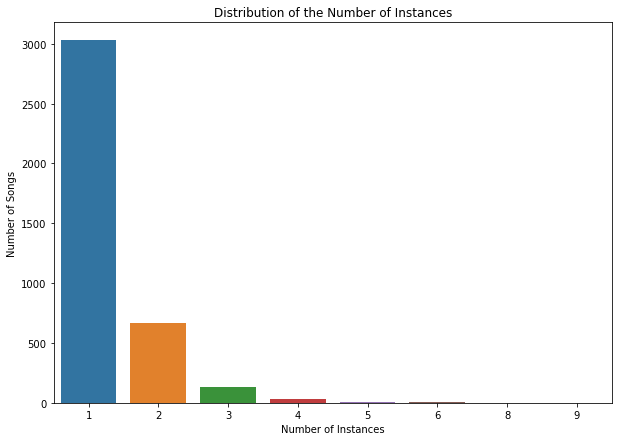

In [28]:
# Plot the distribution
plt.figure(figsize=(10,7))
sns.countplot(max_instances['Instance'])
plt.title('Distribution of the Number of Instances')
plt.xlabel('Number of Instances')
plt.ylabel('Number of Songs')

In [29]:
# Distribution of weeks on the Billboard chart
max_weeks = billboard_100.groupby('Song')['Weeks on Chart'].max().reset_index()
max_weeks['Weeks on Chart'].value_counts()

1     981
20    512
2     313
3     176
4     116
     ... 
61      1
65      1
62      1
79      1
87      1
Name: Weeks on Chart, Length: 64, dtype: int64

Text(0, 0.5, 'Number of Songs')

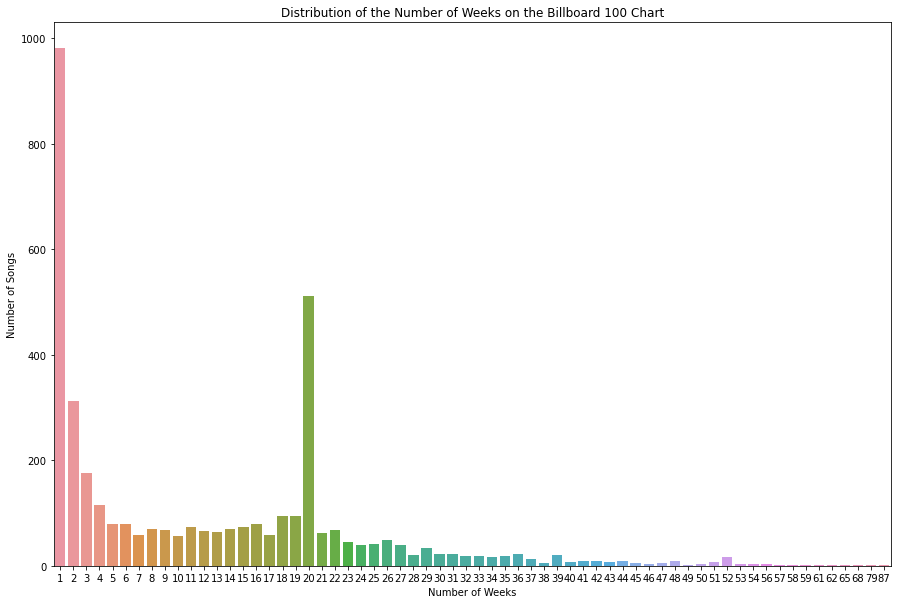

In [30]:
# Plot the distribution
plt.figure(figsize=(15,10))
sns.countplot(max_weeks['Weeks on Chart'])
plt.title('Distribution of the Number of Weeks on the Billboard 100 Chart')
plt.xlabel('Number of Weeks')
plt.ylabel('Number of Songs')

In [33]:
# Look at the songs with the longest time on the charts
max_weeks.loc[max_weeks['Weeks on Chart'] >= 55].sort_values(by = 'Weeks on Chart', ascending=False)

,Song,Weeks on Chart
2679,Radioactive,87
2833,Sail,79
726,Counting Stars,68
2548,Party Rock Anthem,68
2790,Rolling In The Deep,65
1454,Ho Hey,62
821,Demons,61
160,All Of Me,59
3025,Somebody That I Used To Know,59
2909,Shape Of You,58


In [ ]:
peak_position = billboard_100.groupby('Song')['Peak Position'].max().reset_index()


In [ ]:
# Import the Billboard Top 100 audio features Dataset
billboard_100_audio = pd.read_excel('billboard_100_audio.xlsx')

In [ ]:
# Remove duplicate songs
billboard_100_audio.drop_duplicates(subset='SongID', inplace=True)
billboard_100_audio.reset_index()

In [ ]:
# Get the column names 
billboard_100.columns.tolist()

In [ ]:
# more column names
billboard_100_audio.columns.tolist()

In [ ]:
# Function to return the lyrics to each song
def get_lyrics(title, artist):
    try: 
        return genius.search_song(title, artist).lyrics
    except:
        return 'lyrics not found'

In [ ]:
# Function to return the sentiment score for each song
def lyrics_sentiment(lyrics):    
    analysis = TextBlob(lyrics)
    return analysis.sentiment.polarity

In [ ]:
# Text preprocessing
def preprocessing(text):
    document = nlp(text, disable=['ner','parser'])
    lemmas = [token.lemma_ for token in document]
    lemma_clean = [lemma for lemma in lemmas
                  if lemma.isalpha() and lemma not in stopwords]
    return ''.join(lemma_clean)

In [ ]:
# Keyword extraction
def keyword_extract(texts):
    xkeywords = []
    values = keywords(text=precrossing(texts), split='\n', scores=True)
    for x in values[:10]:
        xkeywords.append(x[0])
    try:
        return xkeywords
    except:
        return 'there is no content'

In [ ]:
# Apply the function to get the lyrics
lyrics = billboard_100.apply(lambda row: get_lyrics(row['Song'], row['Performer']), axis=1)
billboard_100['Lyrics'] = lyrics